# Step 1: Importing Required Libreries

In [1]:
import pandas as pd
import numpy as np
import nltk

# Step 2: Load The Dataset

In [2]:
df = pd.read_csv("FINAL_DATASET.csv")

# Step 3: Validating The Dataset

Reading First 5 Records

In [3]:
df.head()

,AMAZON_TEXT_REVIEWS,CATAGORIES
0,I order 3 of them and one of the item is bad q...,Amazon Electronics Products
1,Bulk is always the less expensive way to go fo...,Amazon Electronics Products
2,Well they are not Duracell but for the price i...,Amazon Electronics Products
3,Seem to work as well as name brand batteries a...,Amazon Electronics Products
4,These batteries are very long lasting the pric...,Amazon Electronics Products


Reading Last 5 Records

In [4]:
df.tail()

,AMAZON_TEXT_REVIEWS,CATAGORIES
76534,"Am disabled, retired RN, but always wished I w...",Data Science Book
76535,At one point I considered library work as oppo...,Data Science Book
76536,"Overall, I think this is an excellent resource...",Data Science Book
76537,GREAT,Data Science Book
76538,Execellent info!,Data Science Book


Size of Dataset

below code gives No of Rows and Coloumns in our dataset : Rows-->76539 and cloumns-->2

In [5]:
df.shape

(76539, 2)

Checking Info Of the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76539 entries, 0 to 76538
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AMAZON_TEXT_REVIEWS  76539 non-null  object
 1   CATAGORIES           76539 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


Checking For NULL Values 

In [7]:
print(df.isnull().sum())

AMAZON_TEXT_REVIEWS    0
CATAGORIES             0
dtype: int64


Since There is No Null Values Found in Our Dataset

# Step 4: Representing Dataset Through Bar Graph

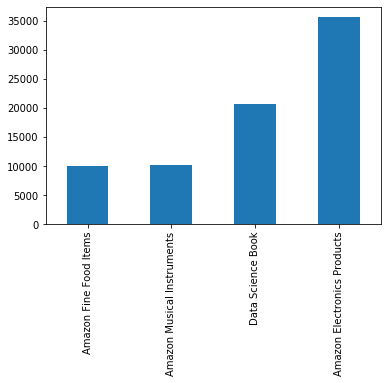

In [8]:
# plotting Bar graph for CATAGORIES
df["CATAGORIES"].value_counts().sort_values().plot.bar()

# Plot distribution of review length

Text(0, 0.5, 'Count')

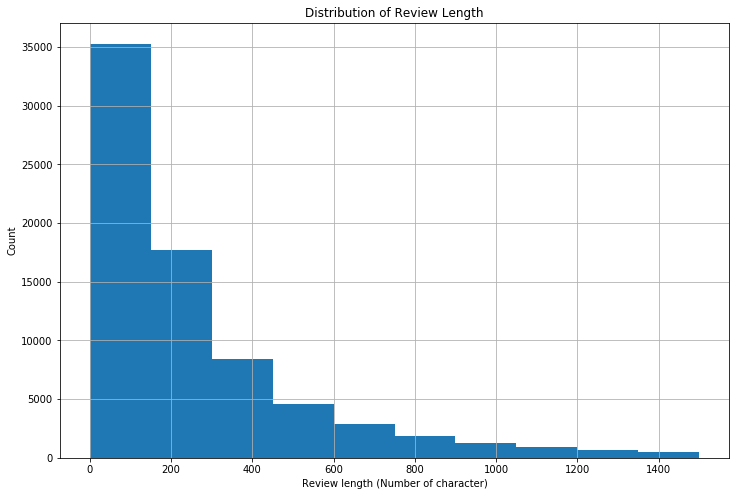

In [9]:
# Plot distribution of review length
import matplotlib.pyplot as plt
review_length = df["AMAZON_TEXT_REVIEWS"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

# Step 5:  Data Pre-Processing

####   DATA NORMALIZATION
   
1. Converting Emojis to their Respective Emotions
2. Removing all Punctuations in the Reviews
3. Removing StopWords
4. Tokenize the Data
5. Stemming
6. Lemmatization

### 1. Converting Emojis to their Respective Emotions

In [4]:
df["AMAZON_TEXT_REVIEWS"] = df["AMAZON_TEXT_REVIEWS"].replace(["\:\)", "\:\-\)", "\:\-\}", "\;\-\}", "\:\-\>", "\;\-\)"], ["Happy","Happy","Happy","Happy","Happy","Happy"], regex=True)
df["AMAZON_TEXT_REVIEWS"] = df["AMAZON_TEXT_REVIEWS"].replace(["\:\-\(", "\:\(", "\:\-\|", "\;\-\(", "\;\-\<", "\|\-\{"], ["Sad", "Sad", "Sad", "Sad", "Sad", "Sad",], regex=True)
df["AMAZON_TEXT_REVIEWS"] = df["AMAZON_TEXT_REVIEWS"].replace(["\:\D", "\:\'\-\)", "\:\`\-\("], ["laugh", "tear of joy", "tear of sadness"], regex=True)

### 2. Removing all punctuations in the Reviews

In [11]:
import string
exclude = set(string.punctuation)
final = exclude

print(len(exclude))
print(len(final))

32
32


In [12]:
print(final)

{';', '{', '\\', '/', '`', '+', '_', '$', '>', '&', '%', ']', ')', '-', '@', '"', '?', '^', '}', '(', '!', '[', "'", '*', '<', '.', '|', '#', ':', '~', '=', ','}


In [13]:
for i in final:
  df['AMAZON_TEXT_REVIEWS'] = df['AMAZON_TEXT_REVIEWS'].str.replace(i, ' ', regex=True)

In [14]:
df.tail()

,AMAZON_TEXT_REVIEWS,CATAGORIES
76534,Am disabled retired RN but always wished I w...,Data Science Book
76535,At one point I considered library work as oppo...,Data Science Book
76536,Overall I think this is an excellent resource...,Data Science Book
76537,GREAT,Data Science Book
76538,Execellent info,Data Science Book


In [15]:
#In last row of the above Record ,in the text Excellent info (!)-->Exclamatory has been removed(Check in the step3 of df.tail())

In [16]:
#Output after Removing Punctuation
df["AMAZON_TEXT_REVIEWS"]

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
76534    Am disabled  retired RN  but always wished I w...
76535    At one point I considered library work as oppo...
76536    Overall  I think this is an excellent resource...
76537                                                GREAT
76538                                     Execellent info 
Name: AMAZON_TEXT_REVIEWS, Length: 76539, dtype: object

## POS Tags

In [5]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df["StopWReviews"] = df["AMAZON_TEXT_REVIEWS"].apply(lambda x: clean_text(x))

In [6]:
df.head()

,AMAZON_TEXT_REVIEWS,CATAGORIES,StopWReviews
0,I order 3 of them and one of the item is bad q...,Amazon Electronics Products,order one item bad quality miss backup spring ...
1,Bulk is always the less expensive way to go fo...,Amazon Electronics Products,bulk always less expensive way go product like
2,Well they are not Duracell but for the price i...,Amazon Electronics Products,well duracell price happy
3,Seem to work as well as name brand batteries a...,Amazon Electronics Products,seem work well name brand battery much good price
4,These batteries are very long lasting the pric...,Amazon Electronics Products,battery long lasting price great


In [7]:
df['CleanedText']=df['StopWReviews']

In [20]:
df.head()

,AMAZON_TEXT_REVIEWS,CATAGORIES,StopWReviews,CleanedText
0,I order 3 of them and one of the item is bad q...,Amazon Electronics Products,order one item bad quality miss backup spring ...,order one item bad quality miss backup spring ...
1,Bulk is always the less expensive way to go fo...,Amazon Electronics Products,bulk always less expensive way go product like,bulk always less expensive way go product like
2,Well they are not Duracell but for the price i...,Amazon Electronics Products,well duracell price happy,well duracell price happy
3,Seem to work as well as name brand batteries a...,Amazon Electronics Products,seem work well name brand battery much good price,seem work well name brand battery much good price
4,These batteries are very long lasting the pric...,Amazon Electronics Products,battery long lasting price great,battery long lasting price great


### Load TextBlob

In [8]:
from textblob import TextBlob
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['CleanedText']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in desc_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
df.head(3)

,AMAZON_TEXT_REVIEWS,CATAGORIES,StopWReviews,CleanedText,tb_Pol,tb_Subj
0,I order 3 of them and one of the item is bad q...,Amazon Electronics Products,order one item bad quality miss backup spring ...,order one item bad quality miss backup spring ...,-0.700000,0.666667
1,Bulk is always the less expensive way to go fo...,Amazon Electronics Products,bulk always less expensive way go product like,bulk always less expensive way go product like,-0.333333,0.383333
2,Well they are not Duracell but for the price i...,Amazon Electronics Products,well duracell price happy,well duracell price happy,0.800000,1.000000


### Load VADER

In [9]:
pip install vaderSentiment

In [23]:
df.tail()

,AMAZON_TEXT_REVIEWS,CATAGORIES,StopWReviews,CleanedText,tb_Pol,tb_Subj
76534,Am disabled retired RN but always wished I w...,Data Science Book,disabled retire rn always wish librarian happy...,disabled retire rn always wish librarian happy...,0.466667,0.766667
76535,At one point I considered library work as oppo...,Data Science Book,one point consider library work oppose work li...,one point consider library work oppose work li...,0.275000,0.616667
76536,Overall I think this is an excellent resource...,Data Science Book,overall think excellent resource anyone pursue...,overall think excellent resource anyone pursue...,0.488889,0.568519
76537,GREAT,Data Science Book,great,great,0.800000,0.750000
76538,Execellent info,Data Science Book,execellent info,execellent info,0.000000,0.000000


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['CleanedText']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['CleanedText']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['CleanedText']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['CleanedText']]
df.head(3)

,AMAZON_TEXT_REVIEWS,CATAGORIES,StopWReviews,CleanedText,tb_Pol,tb_Subj,compound,neg,neu,pos
0,I order 3 of them and one of the item is bad q...,Amazon Electronics Products,order one item bad quality miss backup spring ...,order one item bad quality miss backup spring ...,-0.700000,0.666667,-0.6249,0.298,0.702,0.000
1,Bulk is always the less expensive way to go fo...,Amazon Electronics Products,bulk always less expensive way go product like,bulk always less expensive way go product like,-0.333333,0.383333,0.3612,0.000,0.737,0.263
2,Well they are not Duracell but for the price i...,Amazon Electronics Products,well duracell price happy,well duracell price happy,0.800000,1.000000,0.7003,0.000,0.256,0.744


In [11]:
df.loc[df['neg'] < df['pos'], 'sentiment'] = '1' 
df.loc[df['neg'] >= df['pos'], 'sentiment'] = '-1' 
df.loc[df['neg'] < df['pos'], 'Label'] = 'pos' 
df.loc[df['neg'] >= df['pos'], 'Label'] = 'neg' 
df.head(100)

,AMAZON_TEXT_REVIEWS,CATAGORIES,StopWReviews,CleanedText,tb_Pol,tb_Subj,compound,neg,neu,pos,sentiment,Label
0,I order 3 of them and one of the item is bad q...,Amazon Electronics Products,order one item bad quality miss backup spring ...,order one item bad quality miss backup spring ...,-0.700000,0.666667,-0.6249,0.298,0.702,0.000,-1,neg
1,Bulk is always the less expensive way to go fo...,Amazon Electronics Products,bulk always less expensive way go product like,bulk always less expensive way go product like,-0.333333,0.383333,0.3612,0.000,0.737,0.263,1,pos
2,Well they are not Duracell but for the price i...,Amazon Electronics Products,well duracell price happy,well duracell price happy,0.800000,1.000000,0.7003,0.000,0.256,0.744,1,pos
3,Seem to work as well as name brand batteries a...,Amazon Electronics Products,seem work well name brand battery much good price,seem work well name brand battery much good price,0.700000,0.600000,0.6124,0.000,0.583,0.417,1,pos
4,These batteries are very long lasting the pric...,Amazon Electronics Products,battery long lasting price great,battery long lasting price great,0.250000,0.383333,0.6249,0.000,0.494,0.506,1,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
95,All I buy now is AmazonBasics when it comes to...,Amazon Electronics Products,buy amazonbasics come battery long lasting gre...,buy amazonbasics come battery long lasting gre...,0.287500,0.462500,0.7506,0.000,0.686,0.314,1,pos
96,"Between LeapPads, Xbox controllers and remotes...",Amazon Electronics Products,leappads xbox controller remote use battery lo...,leappads xbox controller remote use battery lo...,0.350000,0.475000,0.6249,0.000,0.745,0.255,1,pos
97,I buy all my batteries here. Great long lastin...,Amazon Electronics Products,buy battery great long lasting battery,buy battery great long lasting battery,0.250000,0.383333,0.6249,0.000,0.549,0.451,1,pos
98,You know those crazy cheap batteries that are ...,Amazon Electronics Products,know crazy cheap battery light practically hit...,know crazy cheap battery light practically hit...,0.237500,0.862500,0.9210,0.046,0.654,0.299,1,pos


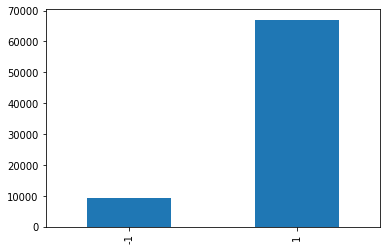

In [26]:
df["sentiment"].value_counts().sort_values().plot.bar()

In [12]:
newdf = df[["CleanedText", "sentiment"]]
newdf.columns = ["reviews", "score"]
newdf.tail()

,reviews,score
76534,disabled retire rn always wish librarian!happy...,1
76535,one point consider library work oppose work li...,1
76536,overall think excellent resource anyone pursue...,1
76537,great,1
76538,execellent info,-1


### Splitting the dataset into Train and Test By using sklearn.model_selection On importing train_test_split

Why Random State is used?

random_state is basically used for reproducing our problem the same every time it is run. If we do not use a random_state in train_test_split, every time we make the split we might get a different set of train and test data points and will not help us in debugging, in case we may get an issue.

In [28]:
from sklearn.model_selection import train_test_split
X = newdf['reviews']
y = newdf['score']
x_train,x_test,y_train,y_test = train_test_split(X,y ,train_size=0.75,test_size=0.25, random_state=101)

## Vectorisation

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with. Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand. We'll do that in three steps using the bag-of-words model: Count how many times does a word occur in each message (Known as term frequency) Weigh the counts, so that frequent tokens get lower weight (inverse document frequency) Normalize the vectors to unit length, to abstract from the original text length (L2 norm) After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

# Applying Algorithms

## 1.Naive Bayes(with precision & Recall, F1-score,confusion matrix) 

In [305]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [306]:
from sklearn.model_selection import train_test_split
X = newdf['reviews']
y = newdf['score']
# Perform a 70-30 time based splitting (shuffle = False)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [307]:
pipeNB = MultinomialNB()

In [308]:
# Create an object of class CountVectorizer
bow = CountVectorizer()
# Call the fit_transform method on training data
X_train = bow.fit_transform(X_train_raw.values)

In [261]:
X_train.shape

(53577, 29072)

In [309]:
# Call the transform method on the test dataset
X_test = bow.transform(X_test_raw.values)

In [263]:
X_test.shape

(22962, 29072)

In [310]:
std = StandardScaler(with_mean=False)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [311]:
pipeNB.fit(X_train, y_train)

MultinomialNB()

### precision & Recall , F1-score

In [312]:
predNB = pipeNB.predict(X_test) #predict testing data

from sklearn.metrics import classification_report
print(classification_report(y_test,predNB))

              precision    recall  f1-score   support

          -1       0.33      0.25      0.28      3352
           1       0.88      0.91      0.89     19610

    accuracy                           0.82     22962
   macro avg       0.60      0.58      0.59     22962
weighted avg       0.80      0.82      0.81     22962



### Confusion Matrix

In [268]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [269]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.ocean_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  826  2526]
 [ 1687 17923]]
Normalized confusion matrix
[[0.25 0.75]
 [0.09 0.91]]


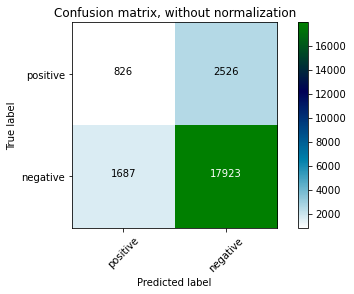

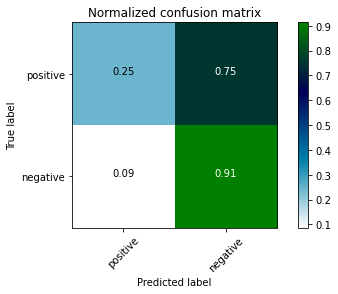

In [270]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,predNB)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [271]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, predNB).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  826
False Positives:  2526
False Negatives:  1687
True Positives:  17923


### How Accurate is our model? Lets check by using confusion Matrix by using the formula
##Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN.

In [88]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 81.65%:


### Metrics beyond Accuracy(precison,Recall,F1-score,specificity)

In [89]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.88


In [90]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.91


In [91]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.89


In [92]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.25


### ROC (Receiver Operating Characteristic curve)

The plot of ‘True Positive Rate’ (Sensitivity/Recall) against the ‘False Positive Rate’ (1-Specificity) at different classification thresholds.
The area under the ROC curve (AUC ) measures the entire two-dimensional area underneath the curve. It is a measure of how well a parameter can distinguish between two diagnostic groups. Often used as a measure of quality of the classification models.
A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1.

In [94]:
rf_prob = pipeNB.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("NaiveByaes AUC: ", rf_auc)

NaiveByaes AUC:  0.5985900476961854


C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


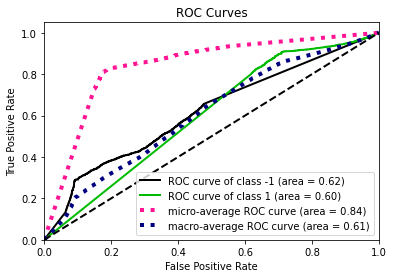

In [95]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba =pipeNB.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

# 2. DECISION TREE

In [96]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [97]:
from sklearn.model_selection import train_test_split
X = newdf['reviews']
y = newdf['score']
# Perform a 70-30 time based splitting (shuffle = False)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [45]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [98]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [99]:
# Create an object of class CountVectorizer
bow = CountVectorizer()
# Call the fit_transform method on training data
X_train = bow.fit_transform(X_train_raw.values)

In [100]:
X_train.shape

(53577, 29072)

In [101]:
# Call the transform method on the test dataset
X_test = bow.transform(X_test_raw.values)

In [102]:
X_test.shape

(22962, 29072)

#### Perform Column Standardization

In [103]:
std = StandardScaler(with_mean=False)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [272]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.853976134483059


### Precisison and Recall

In [147]:
pred = dtree.predict(X_test) #predict testing data

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.44      0.00      0.00      3352
           1       0.85      1.00      0.92     19610

    accuracy                           0.85     22962
   macro avg       0.65      0.50      0.46     22962
weighted avg       0.79      0.85      0.79     22962



## Confusion matrix 

In [148]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [149]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.ocean_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    4  3348]
 [    5 19605]]
Normalized confusion matrix
[[1.19e-03 9.99e-01]
 [2.55e-04 1.00e+00]]


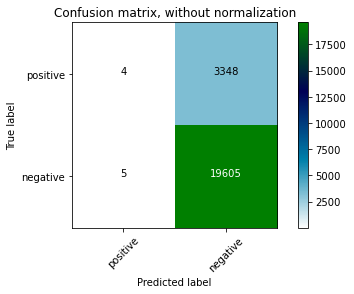

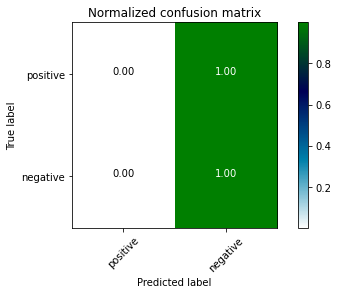

In [150]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [151]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  4
False Positives:  3348
False Negatives:  5
True Positives:  19605


In [152]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 85.40%:


In [153]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.85


In [154]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 1.00


In [155]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.92


In [156]:
#Specificity(TRUE NEGATIVE RATE) 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.00


In [157]:
#Sensitivity(TRUE POSITIVE RATE) 
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 1.00


## ROC (Receiver Operating Characteristic curve) 

In [158]:
from sklearn.metrics import roc_auc_score, roc_curve

In [159]:
rf_prob = dtree.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("DecisionTree AUC: ", rf_auc)

DecisionTree AUC:  0.7262486475533039


C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


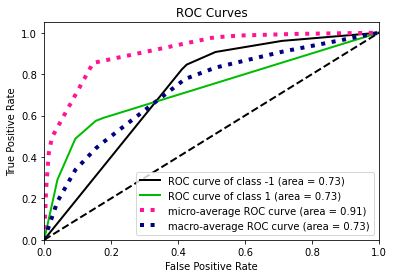

In [160]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba =dtree.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

DECISION TREE VISUALIZATION

In [125]:
pip install graphviz

In [126]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [162]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [161]:
from sklearn.tree import export_graphviz

export_graphviz(
        dtree,
        out_file="AMAZON_TEXT_REVIEWS_DTree.dot",
        rounded=True,
        filled=True
    )

In [58]:
conda install graphviz


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##


  environment location: C:\Users\Avinash\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2020.07  |           py38_0           6 KB
    anaconda-custom            |           py38_1          36 KB
    ca-certificates-2021.4.13  |       haa95532_1         115 KB
    certifi-2020.12.5          |   py38haa95532_0         141 KB
    conda-4.10.1               |   py38haa95532_1         2.9 MB
    cython-0.29.23             |   py38hd77b12b_0         1.7 MB
    gmpy2-2.0.8                |   py38h7edee0f_3         145 KB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    libllvm9-9.0.1             |       h21


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.11=py38_0



graphviz-2.38        | 29.3 MB   | #####7     |  58% 
graphviz-2.38        | 29.3 MB   | #####9     |  59% 
graphviz-2.38        | 29.3 MB   | ######     |  61% 
graphviz-2.38        | 29.3 MB   | ######2    |  63% 
graphviz-2.38        | 29.3 MB   | ######4    |  65% 
graphviz-2.38        | 29.3 MB   | ######6    |  66% 
graphviz-2.38        | 29.3 MB   | ######7    |  68% 
graphviz-2.38        | 29.3 MB   | ######9    |  69% 
graphviz-2.38        | 29.3 MB   | #######    |  71% 
graphviz-2.38        | 29.3 MB   | #######2   |  72% 
graphviz-2.38        | 29.3 MB   | #######3   |  74% 
graphviz-2.38        | 29.3 MB   | #######4   |  75% 
graphviz-2.38        | 29.3 MB   | #######5   |  76% 
graphviz-2.38        | 29.3 MB   | #######7   |  77% 
graphviz-2.38        | 29.3 MB   | #######8   |  78% 
graphviz-2.38        | 29.3 MB   | #######9   |  80% 
graphviz-2.38        | 29.3 MB   | ########1  |  81% 
graphviz-2.38        | 29.3 MB   | ########2  |  82% 
graphviz-2.38        | 29.3

# 3. LOGISTIC REGRESSION

In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [165]:
X = newdf['reviews']
y = newdf['score']

In [166]:
# Perform a 70-30 time based splitting (shuffle = False)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [167]:
X_train_raw.shape, y_train.shape, X_test_raw.shape, y_test.shape

((53577,), (53577,), (22962,), (22962,))

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [169]:
# Create an object of class CountVectorizer
bow = CountVectorizer()
# Call the fit_transform method on training data
X_train = bow.fit_transform(X_train_raw.values)

In [170]:
# Call the transform method on the test dataset
X_test = bow.transform(X_test_raw.values)

In [171]:
std = StandardScaler(with_mean=False)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [90]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [172]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from warnings import filterwarnings
filterwarnings('ignore')

In [273]:
lg_mod = LogisticRegression()
lg_mod.fit(X_train, y_train)

print("Train score: ",lg_mod.score(X_train, y_train))

pred_lg = lg_mod.predict(X_test)
print('Test score:',lg_mod.score(X_test, y_test))

print("Classification report: ",classification_report(pred_lg,y_test))

Train score:  0.9980028743677324
Test score: 0.8587231077432279
Classification report:                precision    recall  f1-score   support

          -1       0.63      0.51      0.57      4112
           1       0.90      0.93      0.92     18850

    accuracy                           0.86     22962
   macro avg       0.76      0.72      0.74     22962
weighted avg       0.85      0.86      0.85     22962



## Confusion matrix 

In [174]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [175]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.ocean_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 2109  1243]
 [ 2001 17609]]
Normalized confusion matrix
[[0.63 0.37]
 [0.1  0.9 ]]


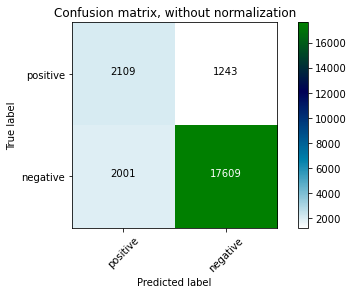

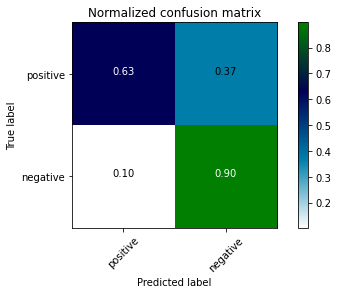

In [176]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,pred_lg)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [177]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, pred_lg).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  2109
False Positives:  1243
False Negatives:  2001
True Positives:  17609


In [178]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 85.87%:


In [179]:
#Specificity(TRUE NEGATIVE RATE) 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.63


In [180]:
#Sensitivity(TRUE POSITIVE RATE) 
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.90


In [181]:
#FALSE POSITIVE RATE
fpr = fp/(tn+fp)
print("FALSE POSITIVE RATE {:0.2f}".format(fpr))

FALSE POSITIVE RATE 0.37


##  ROC (Receiver Operating Characteristic curve)

In [182]:
lg_prob = lg_mod.predict_proba(X_test)[:,-1]
lg_auc = roc_auc_score(y_test, lg_prob)
print("Logistic Regression AUC: ",lg_auc)


Logistic Regression AUC:  0.8224521136505534


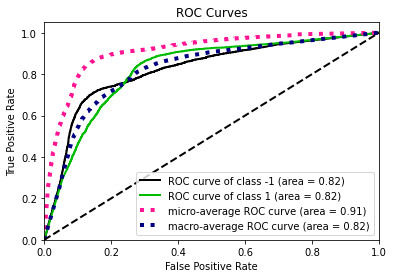

In [183]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba =lg_mod.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

# 4. RANDOM FOREST

In [185]:
X = newdf['reviews']
y = newdf['score']

In [186]:
# Perform a 70-30 time based splitting (shuffle = False)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [187]:
X_train_raw.shape, y_train.shape, X_test_raw.shape, y_test.shape

((53577,), (53577,), (22962,), (22962,))

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [189]:
# Create an object of class CountVectorizer
bow = CountVectorizer()
# Call the fit_transform method on training data
X_train = bow.fit_transform(X_train_raw.values)

In [190]:
X_train.shape

(53577, 29072)

In [191]:
# Call the transform method on the test dataset
X_test = bow.transform(X_test_raw.values)

In [192]:
X_test.shape

(22962, 29072)

In [193]:
std = StandardScaler(with_mean=False)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from warnings import filterwarnings
filterwarnings('ignore')

In [195]:
rf_mod = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state= 10, verbose= 1)
rf_mod.fit(X_train, y_train)

print("Train score: ",rf_mod.score(X_train, y_train))

pred_rf = rf_mod.predict(X_test)
print('Test score:',rf_mod.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train score:  0.9999813352744648


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test score: 0.8957843393432627


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


In [196]:
print("Classification report: ",classification_report(pred_rf,y_test))

Classification report:                precision    recall  f1-score   support

          -1       0.39      0.79      0.52      1677
           1       0.98      0.90      0.94     21285

    accuracy                           0.90     22962
   macro avg       0.69      0.85      0.73     22962
weighted avg       0.94      0.90      0.91     22962



## Confusion matrix 

In [197]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [198]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.ocean_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 1318   359]
 [ 2034 19251]]
Normalized confusion matrix
[[0.79 0.21]
 [0.1  0.9 ]]


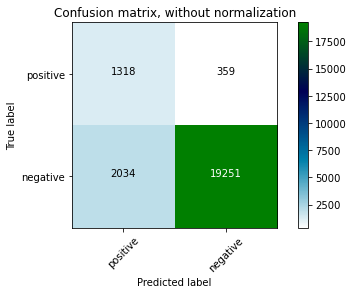

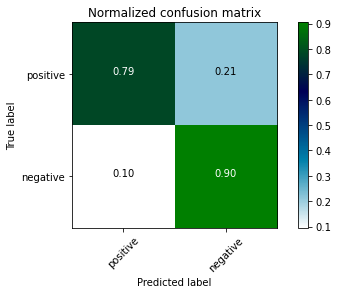

In [199]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(pred_rf,y_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [200]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(pred_rf,y_test).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1318
False Positives:  359
False Negatives:  2034
True Positives:  19251


In [201]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 89.58%:


In [202]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.98


In [203]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.90


In [204]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.94


In [205]:
#Specificity(TRUE NEGATIVE RATE) 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.79


In [206]:
#Sensitivity(TRUE POSITIVE RATE) 
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.90


In [207]:
#FALSE POSITIVE RATE
fpr = fp/(tn+fp)
print("FALSE POSITIVE RATE {:0.2f}".format(fpr))

FALSE POSITIVE RATE 0.21


## ROC (Receiver Operating Characteristic curve)

In [208]:
rf_prob = rf_mod.predict_proba(X_test)[:,-1]
rf_auc = roc_auc_score(y_test,rf_prob)
print("RandomForest AUC: ", rf_auc)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest AUC:  0.9149075985293169


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.8s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


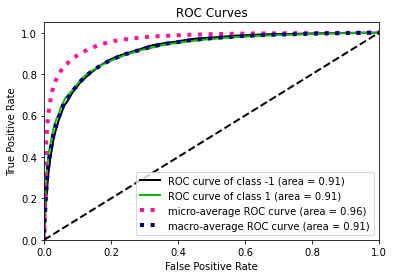

In [209]:
#ROC
import scikitplot as skplt #to make things easy
y_pred_proba =rf_mod.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

## 5. SUPPORT VECTOR MACHINE(LinearSVC)

In [283]:
from sklearn.model_selection import train_test_split
X = newdf['reviews']
y = newdf['score']
X_train,X_test,y_train,y_test = train_test_split(X,y ,train_size=0.75,test_size=0.25, random_state=101)

In [284]:
X_train_raw.shape, y_train.shape, X_test_raw.shape, y_test.shape

((53577,), (57404,), (22962,), (19135,))

#### ROC with AUC score(fitted train in clf.fit)

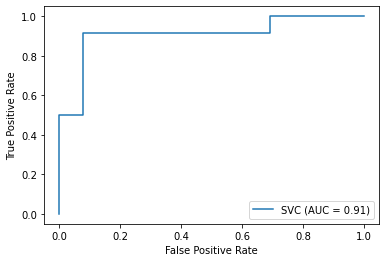

In [285]:
import matplotlib.pyplot as plt  
>>> from sklearn import datasets, metrics, model_selection, svm
>>> X, y = datasets.make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = model_selection.train_test_split(
...     X, y, random_state=0)
>>> clf = svm.SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()

In [286]:
pred = clf.predict(X_test) #predict testing data

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



### Confusion matrix

In [213]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [214]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.ocean_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12  1]
 [ 2 10]]
Normalized confusion matrix
[[0.92 0.08]
 [0.17 0.83]]


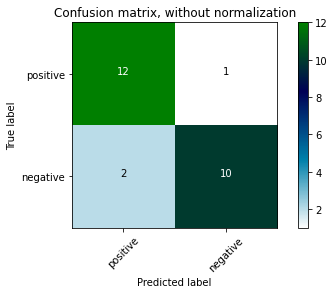

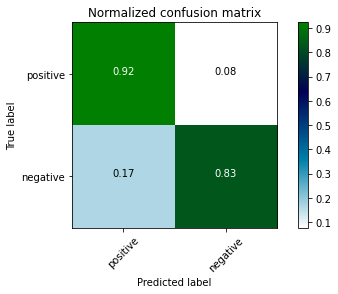

In [215]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [216]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  12
False Positives:  1
False Negatives:  2
True Positives:  10


In [217]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 88.00%:


In [218]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.91


In [219]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.83


In [220]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.87


In [221]:
#Specificity(TRUE NEGATIVE RATE) 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.92


In [222]:
#Sensitivity(TRUE POSITIVE RATE) 
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.83


In [223]:
#FALSE POSITIVE RATE
fpr = fp/(tn+fp)
print("FALSE POSITIVE RATE {:0.2f}".format(fpr))

FALSE POSITIVE RATE 0.08


#### CLEAR VIEW of ALL MATRICS

In [224]:
svm_mod = SVC(probability=True)
svm_mod.fit(X_train, y_train)

print("Train score: ",svm_mod.score(X_train, y_train))

pred_svc = svm_mod.predict(X_test)
print('Test score:',svm_mod.score(X_test, y_test))

print("Classification report: ",classification_report(pred_svc,y_test))

print("Average weighted precision: ",precision_score(y_test,pred_svc))
print("Average weighted recall: ",recall_score(y_test,pred_svc))
print("Average weighted f1 score: ",f1_score(y_test,pred_svc))

Train score:  0.96
Test score: 0.88
Classification report:                precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Average weighted precision:  0.9090909090909091
Average weighted recall:  0.8333333333333334
Average weighted f1 score:  0.8695652173913043


# MODEL COMPARISION

In [246]:
from pandas.plotting import scatter_matrix

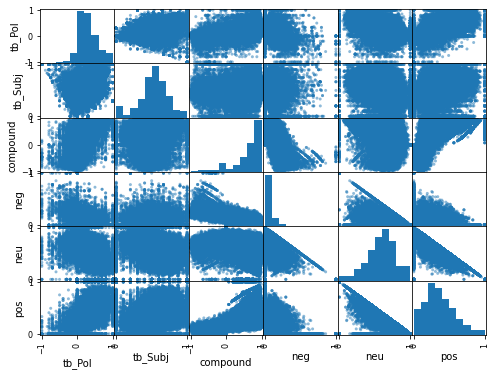

In [249]:
scatter_matrix(df, figsize=(8, 6))
plt.show()

In [274]:
## import statements ##
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [313]:
accuracy_score(y_test,predNB) #Accuracy score of Naive Bayes

0.8165229509624597

In [278]:
accuracy_score(y_test,y_pred) #Accuracy score of Decision Tree

0.853976134483059

In [279]:
accuracy_score(pred_lg,y_test) #Accuracy score of Logistic Regression

0.8587231077432279

In [280]:
accuracy_score(pred_rf,y_test) #Accuracy score of Random Forest

0.8957843393432627

In [287]:
accuracy_score(y_test,pred) #Accuracy score of SVM

0.88

In [299]:
acc=[0.8165,0.8539,0.8587,0.8957,0.8800]

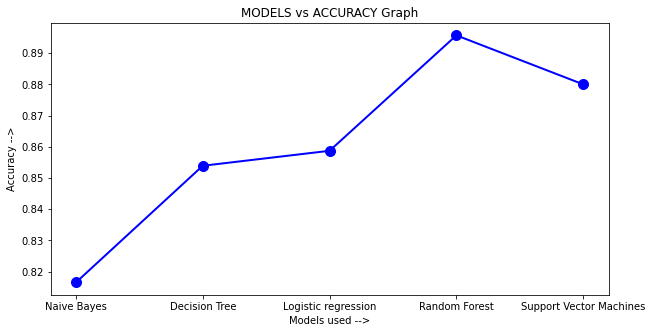

In [315]:
acc=[0.8165,0.8539,0.8587,0.8957,0.8800]
models=["Naive Bayes","Decision Tree","Logistic regression","Random Forest","Support Vector Machines"]
plt.figure(figsize=(10,5))
plt.plot(models,acc,'bo',linestyle='solid',linewidth=2, markersize=10)
plt.xlabel("Models used -->")
plt.ylabel("Accuracy -->")
plt.title("MODELS vs ACCURACY Graph")
plt.show()

We can see that it looks like Random Forest has the largest estimated accuracy score at about 0.8957 or 90%

------------------------------------------------------------------------------------------------------------